# Notebook for correlating ZTF lightcurve statistics with black hole properties

In [1]:
from funcs.lc_analysis import multisurvey_prop
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rc('font', **{'size': 14})
import seaborn as sns

In [5]:
def reader(n_subarray):
    return pd.read_csv('/disk1/hrb/python/data/surveys/ztf/dr2/lc_{}.csv'.format(n_subarray), usecols = [0,1,2,3,4,5], index_col = 0, dtype = {'oid': np.uint64, 'mag': np.float32, 'magerr': np.float32, 'mjd': np.float64, 'uid': np.uint32})


In [4]:
# dr2_g = singlesurvey_prop('g')
# dr2_g.read_in(reader=reader);
dr2_r = multisurvey_prop('r')
dr2_r.read_in(reader=reader);

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
dr2_r.group(read_in=True)

In [ ]:
dr.merge_with_catalogue(catalogue = 'dr12', remove_outliers=False, prop_range_any={'MBH_CIV':(5,13)})

In [53]:
counts, bins = np.histogram(dr2_r.df_grouped['mjd_ptp'],bins = 50)

In [52]:
lower1, lower2 = bins[:-1][(counts == np.sort(counts)[-1]) | (counts == np.sort(counts)[-2])]
uppper1, upper2 = bins[1:][(counts == np.sort(counts)[-1]) | (counts == np.sort(counts)[-2])]

In [68]:
upper2

466.0069445000045

In [5]:
# dr2_g.df.loc[75581].to_csv('g.csv')
# dr2_r.df.loc[75581].to_csv('r.csv')

In [5]:
class vac():
    def __init__(self):
        self.prop_range = {'Mi':(-30,-20),'mag_mean':(15,23.5),'mag_std':(0,1),'redshift':(0,5),'Lbol':(44,48),'nEdd':(-3,0.5),'MBH_MgII':(7,11), 'MBH_CIV':(7,11)}
        self.df = pd.read_csv('/disk1/hrb/python/data/catalogues/SDSS_DR12Q_BH_matched.csv', index_col=16)
        self.df = self.df.rename(columns={'z':'redshift'});
    def filter_(self):
        for key in self.prop_range:
            lower, upper = self.prop_range[key]
            self.df = self.df[(lower < self.df[key]) & (self.df[key] < upper)]

In [20]:
dr12vac = vac()
dr2_r.merge_with_catalogue(dr12vac.df)
dr2_r.info()
# dr12vac.filter_()
prop_range = {'Mi':(-30,-20),'mag_mean':(15,23.5),'mag_std':(0,1),'redshift':(0,5),'Lbol':(44,48),'nEdd':(-3,0.5),'MBH_MgII':(7,11), 'MBH_CIV':(7,11)}
for key in prop_range:
    lower, upper = prop_range[key]
    filtered_properties = dr2_r.properties[(lower < dr2_r.properties[key]) & (dr2_r.properties[key] < upper)]

Number of qsos with lightcurves in r band : 252,585
Number of datapoints: 15,502,474
Max mag: 22.453397750854492, min mag: 13.024394989013672


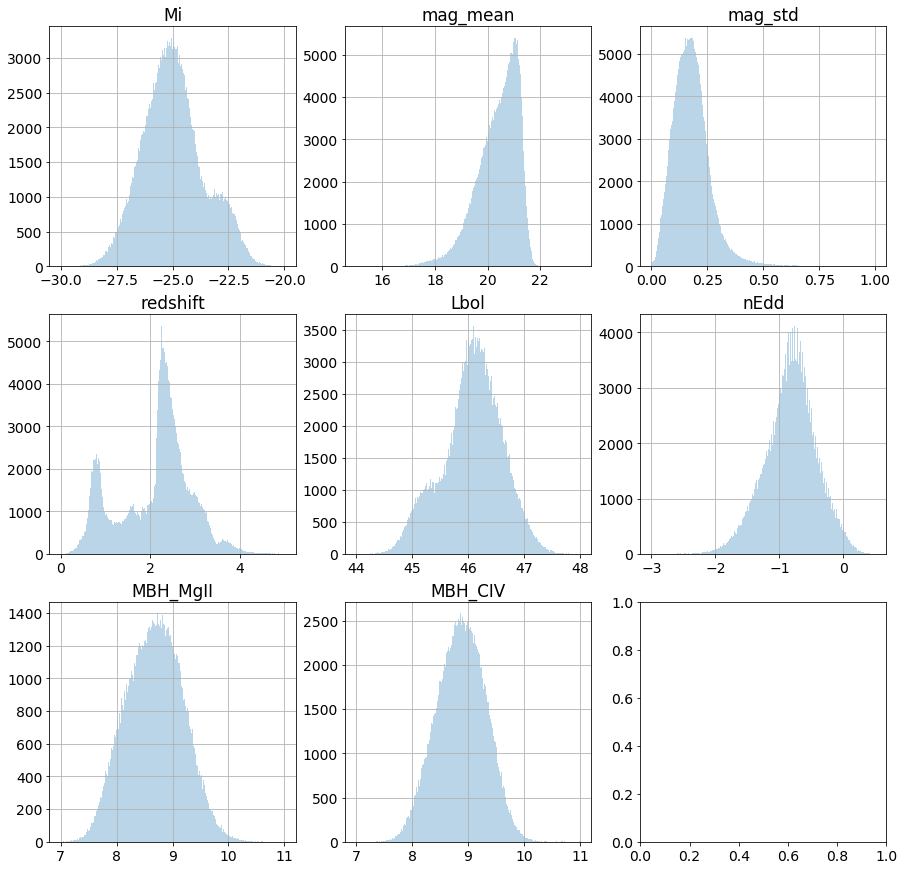

In [14]:
dr2_r.plot_property_distributions(dr12vac.prop_range, n_width = 3, n_bins = 150, separate_catalogues=False)



In [10]:
print('Total number of objects: {:,}'.format(len(dr2_r.properties)))
print('Number of objects within specified range: {:,}'.format(len(filtered_properties)))

Total number of objects: 252,585
Number of objects within specified range: 179,027


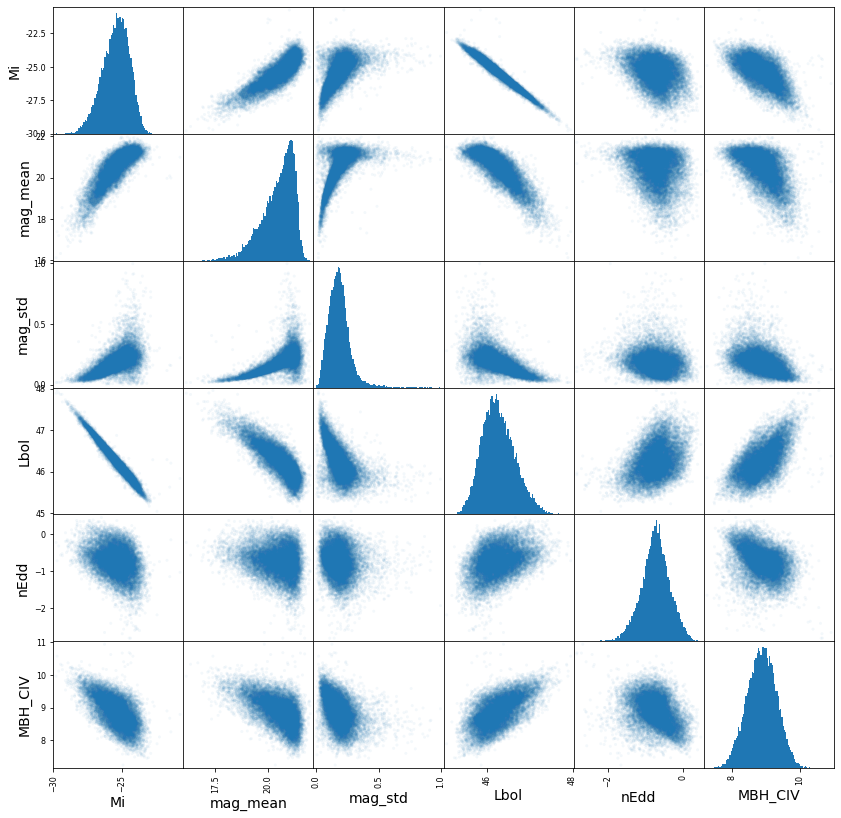

In [9]:
axes = pd.plotting.scatter_matrix(filtered_properties[keys].sample(frac = 0.1),alpha=0.05, figsize = (14,14),diagonal = 'hist',hist_kwds={'bins':100});
# plt.savefig('correlation_pd.pdf',bbox_inches = 'tight')

In [24]:
features = ['MBH_CIV','Lbol','mag_std']
cbar_feature = ['MBH_CIV']
x = filtered_properties[features].sample(frac=0.1)

In [54]:
def scatter_3d(data, keys):
    """
    Plot keys in data

    Parameters
    ----------
    data: dataframe with keys in column
    
    keys : names of columns to be plotted. 
        In format [x,y,z,colorbar]
    """
    from mpl_toolkits.mplot3d import Axes3D
    xlabel, ylabel, zlabel, cbarlabel = keys
    x, y, z, c = data[keys].values.T
    fig = plt.figure(figsize=(10,10))
    ax = Axes3D(fig)
    cbar_ax = ax.scatter(x, y, z, c = c, marker='o', s = 1)
    cbar = plt.colorbar(cbar_ax, shrink = 0.5)
    cbar.ax.set_ylabel(cbarlabel)
    ax.set(xlabel = xlabel, ylabel = ylabel, zlabel = zlabel);

<IPython.core.display.Javascript object>


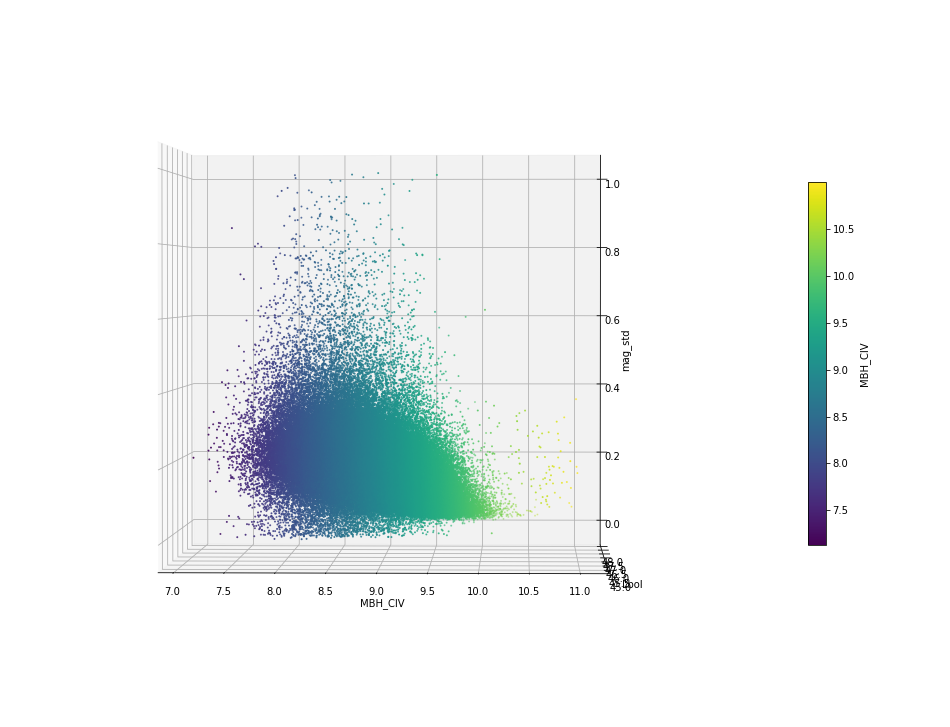

In [55]:
%matplotlib notebook
scatter_3d(filtered_properties,features+cbar_feature)

## Correlation plots

In [16]:
def correlation_plot(data, save = False):
    """
    Plot correlation matrix of data

    Parameters
    ----------
    data : dataframe
    
    save : set to True to save fig

    """
    g = sns.PairGrid(data, layout_pad = -0.2, height = 3)
    g.map_lower(plt.scatter, s = 10, marker = '.', alpha = 0.05)
    g.map_upper(sns.kdeplot, shade = True, n_levels = 10)
    g.map_diag(plt.hist, bins = 100);
    if save == True:
        plt.savefig('correlation_sns.pdf',bbox_inches = 'tight')

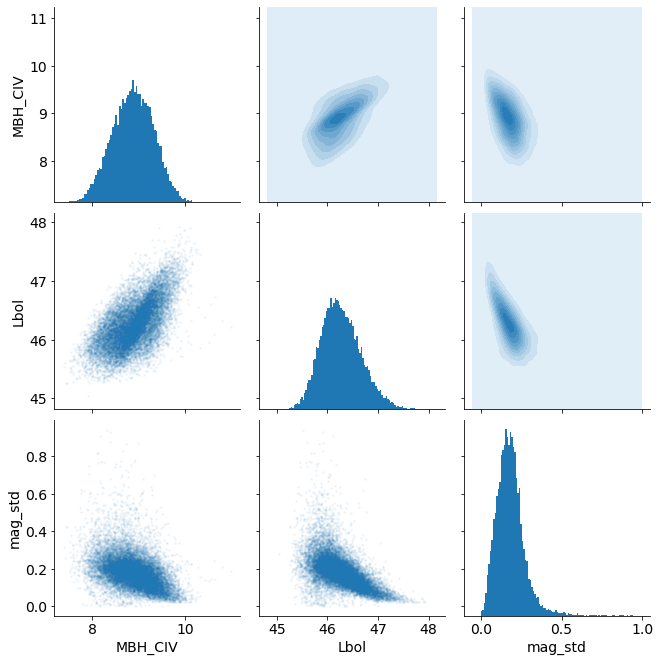

In [17]:
correlation_plot(x)

## PCA analysis
------------

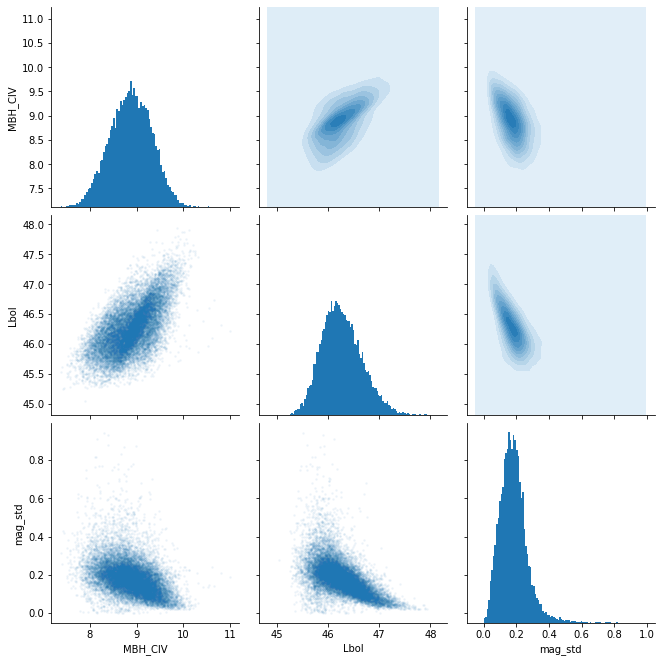

In [18]:
%matplotlib inline
correlation_plot(x)

Standardize the data

In [25]:
qs = x['mag_std'].quantile(q=[0.15866,0.84134,0.97725]).values #-1sig, 1sig, 2sig

In [26]:
def assign_pop(x):
    if x < 0.10232226:
        return 1
    elif (x >= 0.10232226) & (x < 0.25250696):
        return 2
    elif (x >= 0.25250696) & (x < 0.39380597):
        return 3
    else:
        return 4

In [27]:
def pca_(x,n_components):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
#     X = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns, index=x.index)
    pca = PCA(n_components)
    pc = pca.fit_transform(x)
    df_pc = pd.DataFrame(data = pc, columns = ['pc' + str(n) for n in range(1,n_components+1)], index=x.index)
    print('Variance in:')
    for n in range(0,n_components):
        print('pc{}: {:.3f}'.format(n+1,pca.explained_variance_ratio_[n]))
    print('sum: {:.3f}'.format(pca.explained_variance_ratio_.sum()))
    return pca, pd.concat([df_pc,x], axis = 1)
pca, df_pc = pca_(x,2)

Variance in:
pc1: 0.798
pc2: 0.186
sum: 0.984


In [28]:
df_pc

,pc1,pc2,MBH_CIV,Lbol,mag_std
uid,,,,,
2121,-0.112683,-0.143523,8.699,46.318,0.237859
67615,0.199900,0.166556,9.136,46.265,0.131983
3409,0.497047,-0.504881,8.937,46.972,0.090734
190878,-0.886381,-0.361232,7.963,45.983,0.187890
252651,-0.175979,0.146572,8.834,46.044,0.173492
...,...,...,...,...,...
95099,-0.688144,-0.252502,8.186,46.034,0.250144
114411,-0.841392,-0.210666,8.093,45.890,0.147730
204751,0.372377,0.126880,9.244,46.409,0.149934


In [29]:
pca.components_

array([[ 0.7698742 ,  0.63168487, -0.09092826],
       [ 0.63803901, -0.7649897 ,  0.08773239]])

In [30]:
df_pc['variability'] = df_pc['mag_std'].apply(assign_pop)

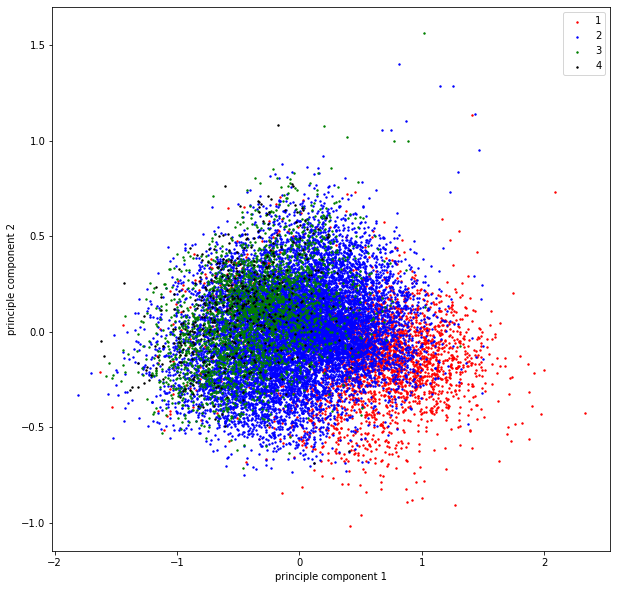

In [31]:
#red are < -1sig, blue -1sig to 1sig, green 1sig to 2sig, black 2sig plus
%matplotlib inline
fig,ax = plt.subplots(1,1,figsize = (10,10))
for target, color in enumerate('rbgk',1):
    subdf = df_pc[df_pc['variability']==target]
    ax.scatter(subdf['pc1'],subdf['pc2'], c = color,s=2, label = target)
ax.set(xlabel='principle component 1', ylabel='principle component 2')
ax.legend()

In [32]:
df_pc

,pc1,pc2,MBH_CIV,Lbol,mag_std,variability
uid,,,,,,
2121,-0.112683,-0.143523,8.699,46.318,0.237859,2
67615,0.199900,0.166556,9.136,46.265,0.131983,2
3409,0.497047,-0.504881,8.937,46.972,0.090734,1
190878,-0.886381,-0.361232,7.963,45.983,0.187890,2
252651,-0.175979,0.146572,8.834,46.044,0.173492,2
...,...,...,...,...,...,...
95099,-0.688144,-0.252502,8.186,46.034,0.250144,2
114411,-0.841392,-0.210666,8.093,45.890,0.147730,2
204751,0.372377,0.126880,9.244,46.409,0.149934,2


Plot MBH vs Lbol, color by vbility

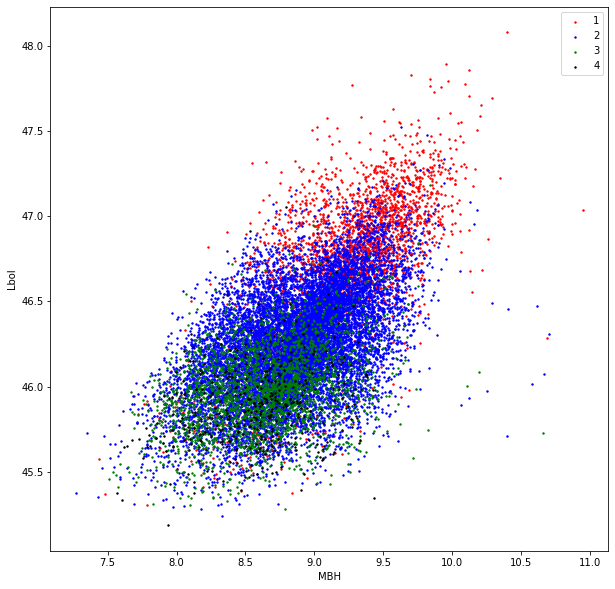

In [33]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
for target, color in enumerate('rbgk',1):
    subdf = df_pc[df_pc['variability']==target]
    ax.scatter(subdf['MBH_CIV'],subdf['Lbol'], c = color,s=2, label = target)
ax.set(xlabel='MBH', ylabel='Lbol')
ax.legend()